$$
% transferring macros:
\let\eps\varepsilon
\let\wt\widetilde
\let\tn\mathrm
\let\vphi\varphi
\let\pa\partial
\let\para\parallel
\let\wh\widehat
\let\sl\shoveleft
% defining new macros:
\def\be{\begin{equation} \mskip 1cm}
\def\ee{\end{equation}}
\def\ba{\begin{align} \mskip 1cm}
\def\ea{\end{align}}
\def\RR{{\mathbb R}}
\def\DD{{\mathbb D}}
\def\GG{{\mathbb G}}
\def\CC{{\mathbb C}}
\def\MM{{\mathbb M}}
\def\JJ{{\mathbb J}}
\def\WW{{\mathbb W}}
\def\HH{{\mathbb H}}
\def\SS{{\mathbb S}}
\def\QQ{{\mathbb Q}}
\def\BB{{\mathbb B}}
\def\grad{\tn{grad}\,}
\def\curl{\tn{curl}\,}
\def\unit{\mathbb 1}
\def\div{\tn{div}\,}
\def\Im{\tn{Im}}
% defining new commands:
\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\bold}[1]{{\bf #1}}
\newcommand{\pder}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dt}[1]{\frac{\mathrm d #1}{\mathrm dt}}
\newcommand{\ds}[1]{\frac{\mathrm d #1}{\mathrm ds}}
$$

# 1D code for adiabatic electrons with temperature

This is a solver for the 1D limit model and for the truncated model with first order correction. We assume periodic boundary conditions in $x \in [0,L]$ and consider electrostatic potentials $\phi = \phi(t,x)$ with zero spatial average. The potential $\phi$ is either a given function or computed self-consistently from the Poisson equation.

## Limit model 

The limit model for the distribution function $f_0$ reads

$$
\be
 f_0(t,x,v) = \mathcal M_{n_0,0,T_0} =  \frac{c_0(t)}{\sqrt{2\pi T_0(t)}} \exp \left[ -\frac{(v^2 - \phi(t,x))}{T_0(t)} \right]\,,
\ee
$$

where the coefficients $c_0(t)$ and $T_0(t)$ satisfy

$$
\be \label{eqs}
 \dt{} \begin{pmatrix}
  c_0
 \\
  T_0
 \end{pmatrix} = \mathbf G(c_0, T_0, \phi)\,.
\ee
$$

Here, the right-hand side $\mathbf G\in \RR^2$ reads

$$
\be
\mathbf G(c_0, T_0, \phi) = \frac{1}{ \frac{c_0}{2} I^2(1) + \frac{c_0}{T_0^2} I(1) I(\phi^2) - \frac{c_0}{T_0^2} I^2(\phi) }
 \begin{pmatrix}
 \frac{c_0}{2} I(1) + \frac{c_0}{T_0^2} I(\phi^2) & \frac{c_0}{T_0^2} I(\phi)
 \\[1mm]
 I(\phi) & I(1)
 \end{pmatrix} \begin{pmatrix}
 -\frac{c_0}{T_0} I \left( \pder{\phi}{t} \right)
 \\[1mm]
 \frac{c_0}{T_0} I \left( \pder{}{t}\frac{\phi^2}{2} \right)
 \end{pmatrix}\,,
\ee
$$

where, for any function $\psi = \psi(t,x)$, we defined the integrals

$$
\be
 I(\psi) = I(\psi)(t) := \int_0^L \psi(t,x)\, \exp \left[ \frac{ \phi(t,x)}{T_0(t)} \right] \,\tn d x\,.
\ee
$$

## Runge-Kutta methods

We will solve \eqref{eqs} with explicit Runge-Kutta (RK) methods of various orders:

$$
\be
 \begin{pmatrix}
  c_0^{n+1}
 \\[0mm]
  T_0^{n+1}
 \end{pmatrix} = 
 \begin{pmatrix}
  c_0^n
 \\[0mm]
  T_0^n
 \end{pmatrix} + \Delta t \sum_{i=1}^s b_i \mathbf k_i\,,\qquad \mathbf k_i = \mathbf G \left(c_0^n + \Delta t \sum_{j=1}^s a_{i,j}\, k_{j,1},\ T_0^n + \Delta t \sum_{j=1}^s a_{i,j}\, k_{j,2},\ \phi(t_n + d_i \Delta t) \right)\,.
\ee
$$

The following Butcher tables will be used:

$$
\begin{array}{c|c}
 0 & 0 
 \\
 \hline
 & 1
\end{array}\,,\qquad
\begin{array}{c|cc}
 0 & 0 &
 \\
 1 & 1 & 0
 \\
 \hline
 & \frac{1}{2} & \frac{1}{2} 
\end{array}\,,\qquad
\begin{array}{c|ccc}
 0 & 0 & &
 \\
 \frac{1}{2} & \frac{1}{2} & 0 &
 \\
 1 & -1 & 2 & 0
 \\
 \hline
 & \frac{1}{6} & \frac{4}{3} & \frac{1}{6}
\end{array}\,,\qquad
\begin{array}{c|cccc}
 0 & 0 &  & &
 \\
 \frac{1}{2} & \frac{1}{2} & 0 & &
 \\
 \frac{1}{2} & 0 & \frac{1}{2} & 0 &
 \\
 1 & 0 & 0 & 1 & 0
 \\
 \hline
 & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
\end{array}
$$

__First order method (forward Euler):__

$$
\be
 \mathbf k_1 =  \mathbf G \left(c_0^n,\ T_0^n ,\ \phi(t_n) \right)\,.
\ee
$$

__Second order method (improved Euler method):__

$$
\ba
 \mathbf k_1 &=  \mathbf G \left(c_0^n,\ T_0^n ,\ \phi(t_n) \right)\,,
 \\[2mm]
 \mathbf k_2 &= \mathbf G \left(c_0^n + \Delta t \, k_{1,1},\ T_0^n + \Delta t \, k_{1,2},\ \phi(t_n + \Delta t) \right)\,.
\ea
$$

__Third order method (Kutta's third order rules):__

$$
\ba
 \mathbf k_1 &=  \mathbf G \left(c_0^n,\ T_0^n ,\ \phi(t_n) \right)\,,
 \\[2mm]
 \mathbf k_2 &= \mathbf G \left(c_0^n + \frac{1}{2}\Delta t\, k_{1,1},\ T_0^n + \frac{1}{2}\Delta t \, k_{1,2},\ \phi \left(t_n + \frac{1}{2} \Delta t \right) \right)\,,
 \\[2mm]
 \mathbf k_3 &= \mathbf G \left(c_0^n - \Delta t \, k_{1,1} + 2\Delta t \, k_{2,1},\ T_0^n - \Delta t \, k_{1,2} + 2 \Delta t \, k_{2,2},\ \phi(t_n + \Delta t) \right)\,.
\ea
$$

__Fourth order method (standard RK):__

$$
\ba
 \mathbf k_1 &=  \mathbf G \left(c_0^n,\ T_0^n ,\ \phi(t_n) \right)\,,
 \\[2mm]
 \mathbf k_2 &= \mathbf G \left(c_0^n + \frac{1}{2}\Delta t \, k_{1,1},\ T_0^n + \frac{1}{2}\Delta t \, k_{1,2},\ \phi\left(t_n + \frac{1}{2} \Delta t \right) \right)\,,
 \\[2mm]
 \mathbf k_3 &= \mathbf G \left(c_0^n + \frac{1}{2}\Delta t \, k_{2,1},\ T_0^n + \frac{1}{2}\Delta t \, k_{2,2},\ \phi\left(t_n + \frac{1}{2} \Delta t\right) \right)\,,
 \\[2mm]
 \mathbf k_4 &= \mathbf G \left(c_0^n + \Delta t \, k_{3,1},\ T_0^n + \Delta t \, k_{3,2},\ \phi(t_n + \Delta t) \right)\,.
\ea
$$

In [1]:
# import libraries:

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import integrate
import time

In [2]:
a = 0
b = 2*np.pi
Nel = 32
dx = (b-a)/Nel
x_vec = np.linspace(a, b, Nel + 1) 
# the spatial domain

v_min = -5
v_max = 5
Nv = 64
dv = (v_max - v_min)/Nv
v_vec = np.linspace(v_min, v_max, Nv + 1)
# velocity domain

t_0 = 0
t_Nt = 1
Nt = 100
dt = (t_Nt - t_0)/Nt
t_vec = np.linspace(t_0, t_Nt, Nt + 1)
# the time domain

k = 1
om = 2*np.pi
#phi = lambda t, x: np.sin(k*x - om*t) 
# no dynmaics for plane waves!!!
phi = lambda t, x: np.sin(k*x)*np.sin(om*t) 
dt_phi = lambda t, x: om*np.sin(k*x)*np.cos(om*t) 
# given electrostatic potential and its time derivative

c0 = 1.0
T0 = 1.0
n0 = c0*np.exp(phi(t_vec[0], x_vec) / T0 )
# initial density

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
line1, = ax.plot(x_vec, phi(t_vec[0], x_vec), label='potential')
line2, = ax.plot(x_vec, n0, label='density')
line3, = ax.plot(x_vec, n0, label='new model')
ax.legend()
# showing the initial potential and density

<IPython.core.display.Javascript object>

$$
\be
\mathbf G(c_0, T_0, \phi) = \frac{1}{ \frac{c_0}{2} I^2(1) + \frac{c_0}{T_0^2} I(1) I(\phi^2) - \frac{c_0}{T_0^2} I^2(\phi) }
 \begin{pmatrix}
 \frac{c_0}{2} I(1) + \frac{c_0}{T_0^2} I(\phi^2) & \frac{c_0}{T_0^2} I(\phi)
 \\[1mm]
 I(\phi) & I(1)
 \end{pmatrix} \begin{pmatrix}
 -\frac{c_0}{T_0} I \left( \pder{\phi}{t} \right)
 \\[1mm]
 \frac{c_0}{T_0} I \left( \pder{}{t}\frac{\phi^2}{2} \right)
 \end{pmatrix}\,,
\ee
$$

<IPython.core.display.Javascript object>


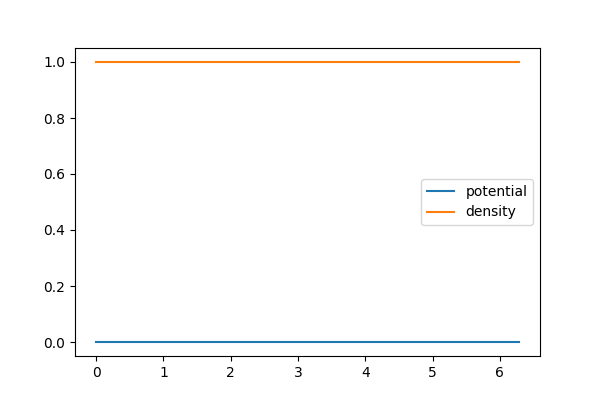

TypeError: only size-1 arrays can be converted to Python scalars

In [23]:
#######################
### Runge-Kutta scheme:
#######################
RK_order = 1

ufun = lambda x: 1
k_1 = 1

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
line1, = ax.plot(x_vec, phi(t_vec[0], x_vec), label='potential')
line2, = ax.plot(x_vec, n0, label='density')
ax.legend()
# showing the initial potential and density

def w_mean(psi, t, T0):
    func = lambda x: psi(x)*np.exp(phi(t, x)/T0)
    return integrate.quad(func, a, b)

for t in t_vec:
    
    del w_mean
    def w_mean(psi, t, T0):
        func = lambda x: psi(x)*np.exp(phi(t, x)/T0)
        return integrate.quad(func, a, b)[0]
        # The integral function I(psi)
    
    I_1 = w_mean(ufun, t, T0)
    
    phi_x = lambda x: phi(t, x) 
    I_phi = w_mean(phi_x, t, T0)
    
    phi2_x = lambda x: phi(t, x)**2 
    I_phi2 = w_mean(phi2_x, t, T0)
    
    dt_phi_x = lambda x: dt_phi(t, x) 
    I_dt_phi = w_mean(dt_phi_x, t, T0)
    
    prod_x = lambda x: dt_phi(t, x)*phi(t, x) 
    I_prod = w_mean(prod_x, t, T0)
    
    det = c0/2*I_1**2 + c0/T0**2*I_1*I_phi2 - c0/T0**2*I_phi**2
    mat = np.zeros((2, 2))
    vec = np.zeros(2)
    
    mat[0][0] = c0/2*I_1 + c0/T0**2*I_phi2
    mat[1][0] = I_phi
    mat[0][1] = c0/T0**2*I_phi
    mat[1][1] = I_1
    
    vec[0] = -c0/T0*I_dt_phi
    vec[1] = c0/T0*I_prod
    
    k_1 = mat.dot(vec) 
    print(k_1)
    
    if RK_order == 1:
        
        c0 += dt*k_1[0]
        T0 += dt*k_1[1]
    
    line1.set_ydata( phi(t, x_vec) )
    line2.set_ydata( 1*np.exp(phi(t, x_vec) / 1 ) )
    line3.set_ydata( c0*np.exp(phi(t, x_vec) / T0 ) )
    fig.canvas.draw()

In [22]:
k_1

1

In [ ]:
gaussian = lambda v: np.exp(-v**2/(2*T0)) / np.sqrt(2*np.pi*T0)
# homogeneous Maxwellian

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
line1, = ax.plot(v_vec, gaussian(v_vec), label='Gaussian')
ax.legend()


In [11]:
T0

array([1., 1.])

In [4]:
k_1

array([[-4.16085957e-15,  0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00]])

In [5]:
mat

array([[3.14159265, 0.        ],
       [0.        , 6.28318531]])

In [6]:
vec

array([-1.32444274e-15,  0.00000000e+00])

In [7]:
mat*vec

array([[-4.16085957e-15,  0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00]])

In [8]:
np.prod?

In [9]:
mat.dot(vec) 

array([-4.16085957e-15,  0.00000000e+00])